#### 1. **Introduction to K-Means Clustering**

**K-Means Clustering** is an unsupervised learning algorithm used to group similar data points into a predefined number of clusters, $ K $. The objective is to partition the dataset into $ K $ clusters, where each data point belongs to the cluster with the nearest mean, minimizing the variance within each cluster.

**Applications of K-Means**:
- Market segmentation
- Image compression
- Document clustering
- Anomaly detection

---

#### 2. **How K-Means Works**

The K-Means algorithm works iteratively to partition a dataset into $ K $ clusters. Here's how the algorithm proceeds:

1. **Step 1**: Initialize $ K $ centroids randomly.
2. **Step 2**: Assign each data point to the nearest centroid, forming $ K $ clusters.
3. **Step 3**: Recalculate the centroids as the mean of all data points assigned to each cluster.
4. **Step 4**: Repeat steps 2 and 3 until the centroids no longer change, or the algorithm converges.

---

#### 3. **Mathematical Explanation**

Given a dataset $ X $ with $ n $ observations, the objective is to minimize the following **within-cluster sum of squares (WCSS)**:

$$
\sum_{i=1}^{K} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

Where:
- $ C_i $ is the set of points assigned to cluster $ i $,
- $ \mu_i $ is the centroid of cluster $ i $,
- $ \| x - \mu_i \|^2 $ is the squared Euclidean distance between a point $ x $ and the centroid $ \mu_i $.

---

#### 4. **Step-by-Step Example**

Consider a simple 2D dataset with 10 data points that we want to cluster into $ K = 2 $ clusters.

| X1  | X2  |
|-----|-----|
| 1.0 | 2.0 |
| 1.5 | 1.8 |
| 5.0 | 8.0 |
| 8.0 | 8.0 |
| 1.0 | 0.6 |
| 9.0 | 11.0|
| 8.0 | 2.0 |
| 10.0| 2.0 |
| 9.0 | 3.0 |
| 10.0| 8.0 |

We will apply the K-Means algorithm with $ K = 2 $ to group these points.

---

#### **Step 1: Initialize Centroids**

Start by randomly choosing 2 points as initial centroids. Let’s choose:

$$
\mu_1 = (1.0, 2.0), \quad \mu_2 = (10.0, 8.0)
$$

#### **Step 2: Assign Data Points to Nearest Centroid**

For each data point, calculate the Euclidean distance to both centroids and assign the point to the nearest one.

- For point (1.5, 1.8): 
  $$
  d((1.5, 1.8), \mu_1) = 0.54, \quad d((1.5, 1.8), \mu_2) = 10.73
  $$
  So, assign (1.5, 1.8) to $ \mu_1 $.

Repeat this for all data points, and you will get two clusters.

#### **Step 3: Recalculate Centroids**

After assigning all points to clusters, recalculate the centroids by taking the mean of all points in each cluster. 

For example, if points $ (1.0, 2.0), (1.5, 1.8), (1.0, 0.6) $ are assigned to $ \mu_1 $, then the new centroid for $ \mu_1 $ is:

$$
\mu_1 = \left(\frac{1.0 + 1.5 + 1.0}{3}, \frac{2.0 + 1.8 + 0.6}{3}\right) = (1.17, 1.47)
$$

#### **Step 4: Repeat Until Convergence**

Repeat steps 2 and 3 until the centroids stop changing, or the changes are below a specified threshold.

---

#### 5. **Python Code Example**

Here's how to implement K-Means clustering in Python using `scikit-learn`:

c:\Users\me\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


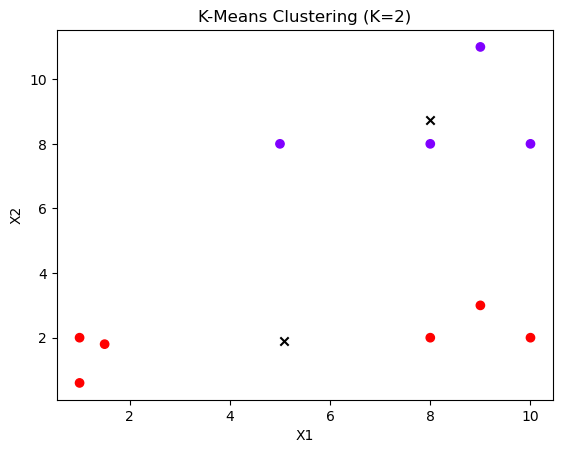

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Create the dataset
data = {'X1': [1.0, 1.5, 5.0, 8.0, 1.0, 9.0, 8.0, 10.0, 9.0, 10.0],
        'X2': [2.0, 1.8, 8.0, 8.0, 0.6, 11.0, 2.0, 2.0, 3.0, 8.0]}

df = pd.DataFrame(data)

# Step 2: Apply K-Means with K=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

# Step 3: Get the cluster labels
df['Cluster'] = kmeans.labels_

# Step 4: Plot the clusters and centroids
plt.scatter(df['X1'], df['X2'], c=df['Cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x')
plt.title('K-Means Clustering (K=2)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

**Explanation**:
- **Step 1**: We create a simple 2D dataset.
- **Step 2**: We apply K-Means clustering with $ K = 2 $.
- **Step 3**: We assign each data point to a cluster and store the result in the DataFrame.
- **Step 4**: We plot the clusters with different colors and mark the centroids with black 'x's.

---

#### 6. **Choosing the Right K (Elbow Method)**

One challenge with K-Means is selecting the appropriate number of clusters $ K $. The **Elbow Method** is a technique used to determine the optimal $ K $ by plotting the **within-cluster sum of squares (WCSS)** against different values of $ K $.

- **Steps**:
  1. Run K-Means for a range of $ K $ values.
  2. Plot the WCSS for each $ K $.
  3. Look for the "elbow" point in the plot, where the decrease in WCSS slows down. This is the ideal $ K $.

Here’s how to apply the elbow method in Python:

c:\Users\me\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\me\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\me\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\me\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

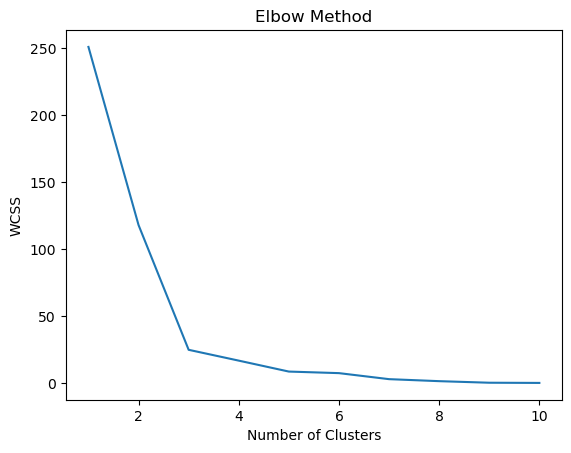

In [2]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['X1', 'X2']])
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

---

#### 7. **Conclusion**

K-Means is a simple and efficient clustering algorithm, widely used for partitioning datasets into clusters. It’s easy to implement, but it has some limitations, such as the need to specify the number of clusters in advance and sensitivity to the initial choice of centroids.

**Homework**:  
Apply the K-Means algorithm on a dataset with more features and try different values of $ K $. Use the elbow method to identify the best number of clusters. Visualize the results using a scatter plot or other visualization techniques.